In [1]:
#import libraries
import requests
from datetime import datetime as dt
from datetime import timedelta
import pandas as pd

In [2]:
# get events from n days ago
look_back_days = 45

days_ago_dte = dt.now() - timedelta(days=look_back_days)
print (days_ago_dte, type(days_ago_dte)) #gives us a time object
days_ago = days_ago_dte.strftime('%Y-%m-%d')
print (days_ago, type(days_ago)) #converts the time object to string so it can be based into the request

# you can limit the number of records that return from the API
# set to 0 for no limit
limit = 10

# Required registration to get a unique API key in order to access the ACLED API
# URL: https://developer.acleddata.com
# api_url = 'https://api.acleddata.com/acled/read?terms=accept&event_date={}&event_date_where=%3E=&limit={}'.format(days_ago, limit)
#api_url = 'https://api.acleddata.com/acled/read?key={API_KEY}&email={alexzzlin@gmail.com}'
#api_url = 'https://api.acleddata.com/acled/read?key=API_KEY&email=alexzzlin@gmail.com'
api_url = 'https://api.acleddata.com/acled/read?key=PH-oxHF9EF8IavXOxd9v&email=alexzzlin@gmail.com&limit=50'
#api_url = 'https://api.acleddata.com/acled/read?terms=accept&event_date={}&event_date_where=%3E=&limit={}'.format(days_ago, limit)
print (api_url, type(api_url)) #creates request according to ACLED format specifications - p. 13

2021-02-05 23:38:27.447632 <class 'datetime.datetime'>
2021-02-05 <class 'str'>
https://api.acleddata.com/acled/read?key=PH-oxHF9EF8IavXOxd9v&email=alexzzlin@gmail.com&limit=50 <class 'str'>


In [3]:
#response = requests.get('https://api.acleddata.com/acled/read', headers={ 'Authorization': 'Bearer <your_token>' })
#print response.json()

In [4]:
response = requests.get(api_url) # Reality I spent 45 minutes figuring out why my search kept failing 
                                # and learned I had an older user guide that didn't include terms=accept 

In [5]:
#headers = {'Authorization': 'Bearer {}'.format('PH-oxHF9EF8IavXOxd9v')}
#api_url = 'https://api.acleddata.com/acled/read'
# 'term': 'coffee', 'location': 'Toronto, Ontario',
#params = {'limit': 50, 'key': 'PH-oxHF9EF8IavXOxd9v', 'email': 'alexzzlin@gmail.com'}
#response = requests.get(api_url, params=params, timeout=5)

In [6]:
print(response.headers)

{'Date': 'Tue, 23 Mar 2021 03:38:31 GMT', 'Server': 'Apache', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'GET,POST', 'Access-Control-Max-Age': '3600', 'Access-Control-Allow-Headers': 'Content-Type, Access-Control-Allow-Headers, Authorization, X-Requested-With', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'Upgrade': 'h2,h2c', 'Connection': 'Upgrade, Keep-Alive', 'Keep-Alive': 'timeout=5, max=100', 'Transfer-Encoding': 'chunked', 'Content-Type': 'application/json'}


In [7]:
print(response.url)
print(response.status_code)

https://api.acleddata.com/acled/read?key=PH-oxHF9EF8IavXOxd9v&email=alexzzlin@gmail.com&limit=50
200


In [8]:
data = response.json()
data.keys()

dict_keys(['status', 'success', 'count', 'error'])

In [9]:
data['status'], data['success'], data['count'] # see the refrenet for API status codes

(403, False, 0)

In [10]:
data

{'status': 403,
 'success': False,
 'count': 0,
 'error': {'status': 403,
  'message': 'You have reached your download limit for the year. To download more ACLED data, you can either wait until the start of your yearly cycle (one year from the date you registered) or reach out to the ACLED Access team (access@acleddata.com) to discuss other options.'}}

In [11]:
'''
data_new = data['data'] #getting just the data 
rows = len(data_new)
print ('ACLED API returned {} rows'.format(rows))
'''

"\ndata_new = data['data'] #getting just the data \nrows = len(data_new)\nprint ('ACLED API returned {} rows'.format(rows))\n"

In [12]:
#convert it into an pandas data frame
'''
acled_data = pd.DataFrame.from_dict(data_new)
acled_data
'''

'\nacled_data = pd.DataFrame.from_dict(data_new)\nacled_data\n'

In [13]:
#Do all necessary Pacakge Imports
from imports import *

C:\Users\Alex\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [14]:
#Create a dataHandler class for our dataframe 
data = dh()

In [15]:
#Get Data for crisis in asia and southern asia
# Data Range: 1997 to March 2021
southern_asia_df = data.filter_data(region=['South Asia', 'Southeast Asia'])
asia_df = data.filter_data(region=['Middle East', 'South Asia', 'Southeast Asia'])

#Get Data for crisis in asia and southern asia caused by rebel groups
asia_rebel_groups_df = data.filter_data(region=['Middle East', 'South Asia', 'Southeast Asia'], rebel_groups=True)
southern_asia_rebel_groups_df = data.filter_data(region=['South Asia'], rebel_groups=True)

In [16]:
southern_asia_df

,data_id,iso3,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,479055,50,50,BGD7240,7240,01-January-2010,2010,1,Riots,Mob violence,...,Patuakhali,Patuakhali,22.368,90.346,2,Daily Star (Bangladesh),National,"On 1 Jan 2010, in Patuakhali district (Barisal...",0,1563366746
1,479056,50,50,BGD7242,7242,01-January-2010,2010,2,Riots,Violent demonstration,...,Rajshahi,Rajshahi,24.374,88.601,1,Daily Star (Bangladesh),National,"Assumed on 1 Jan 2010, in Rajshahi city (Rajsh...",0,1563366746
2,479057,50,50,BGD7243,7243,01-January-2010,2010,1,Riots,Mob violence,...,Shailkupa,Shailkupa,23.684,89.242,2,Daily Star (Bangladesh),National,"On 1 Jan 2010, in Shailokupa upazila (Jhenaida...",0,1563366746
3,479058,50,50,BGD7246,7246,01-January-2010,2010,1,Riots,Mob violence,...,Morrelganj,Morrelganj,22.438,89.851,2,Daily Star (Bangladesh),National,"On 1 Jan 2010, in Morelganj upazila (Bagerhat,...",0,1563366746
4,479059,50,50,BGD7247,7247,01-January-2010,2010,1,Riots,Mob violence,...,Kachua,Kachua,22.653,89.885,2,Daily Star (Bangladesh),National,"On 1 Jan 2010, in Kachua upazila (Bagerhat, Kh...",0,1563366746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229216,708271,764,764,THA9032,9032,12-March-2021,2021,1,Strategic developments,Looting/property destruction,...,Tha Sap,Sakho,6.559,101.263,1,Isranews Agency,National,"Property destruction: On 12 March 2021, Malay ...",0,1615920638
229217,708272,764,764,THA9028,9028,12-March-2021,2021,1,Protests,Peaceful protest,...,No actor 2,Khon Kaen,16.447,102.833,1,Matichon,National,"On 12 March 2021, a royalist group staged a de...",0,1615920638
229218,708273,764,764,THA9025,9025,12-March-2021,2021,1,Protests,Peaceful protest,...,No actor 2,Bangkok-Lak Si,13.882,100.569,1,Prachatai,National,"On 12 March 2021, twenty activists and family ...",0,1615920638
229219,708274,764,764,THA9024,9024,12-March-2021,2021,1,Protests,Peaceful protest,...,No actor 2,Bangkok-Dusit,13.778,100.520,1,Siam Rath,National,"On 12 March 2021, Karen villagers and members ...",0,1615920638


In [17]:
asia_rebel_groups_df[:3]

,data_id,iso3,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
82,24522,364,364,IRN7158,7158,30-August-2020,2020,1,Explosions/Remote violence,Shelling/artillery/missile attack,...,Central,Maku,39.295,44.498,2,Hengaw,Regional,"On 30 August 2020, Turkish artillery, after ge...",0,1599494153
95,26300,368,368,IRQ15169,15169,01-January-2016,2016,1,Explosions/Remote violence,Shelling/artillery/missile attack,...,No actor 2,Nahiyat al Amiriyah,33.172,43.860,1,Al Maloomah,National,"On Jan 01, IS militants targeted residential a...",10,1567462133
96,26301,368,368,IRQ6805,6805,01-January-2016,2016,1,Battles,Armed clash,...,No actor 2,Sinjar,36.295,41.893,2,Gali Kurdistan TV,Subnational,"On Jan 01, Peshmerga forces repelled an attack...",0,1567462150


### Variables of Interest
 
Fatalities, Event Type, Sub Event Type, Actor1, Inter1, Actor2, Inter2, Interaction, Region, Country, Admin1, Admin2, Admin3, Location, latitude, and longitude.

To better understand the predictors look at documentation in Understanding_data folder.

### Types of Actors involved in Crisis Dataset
State Forces, Rebel Groups, Political Militias, Identity Militias, Rioters, Protestors, Civilian, External/Other Forces

### Crisis Data Initial Exploration for Asia
Crisis to Fatalities per Country caused by All Actors[1997 to March 2021]

### Does this comport with what is the in the documentation? 

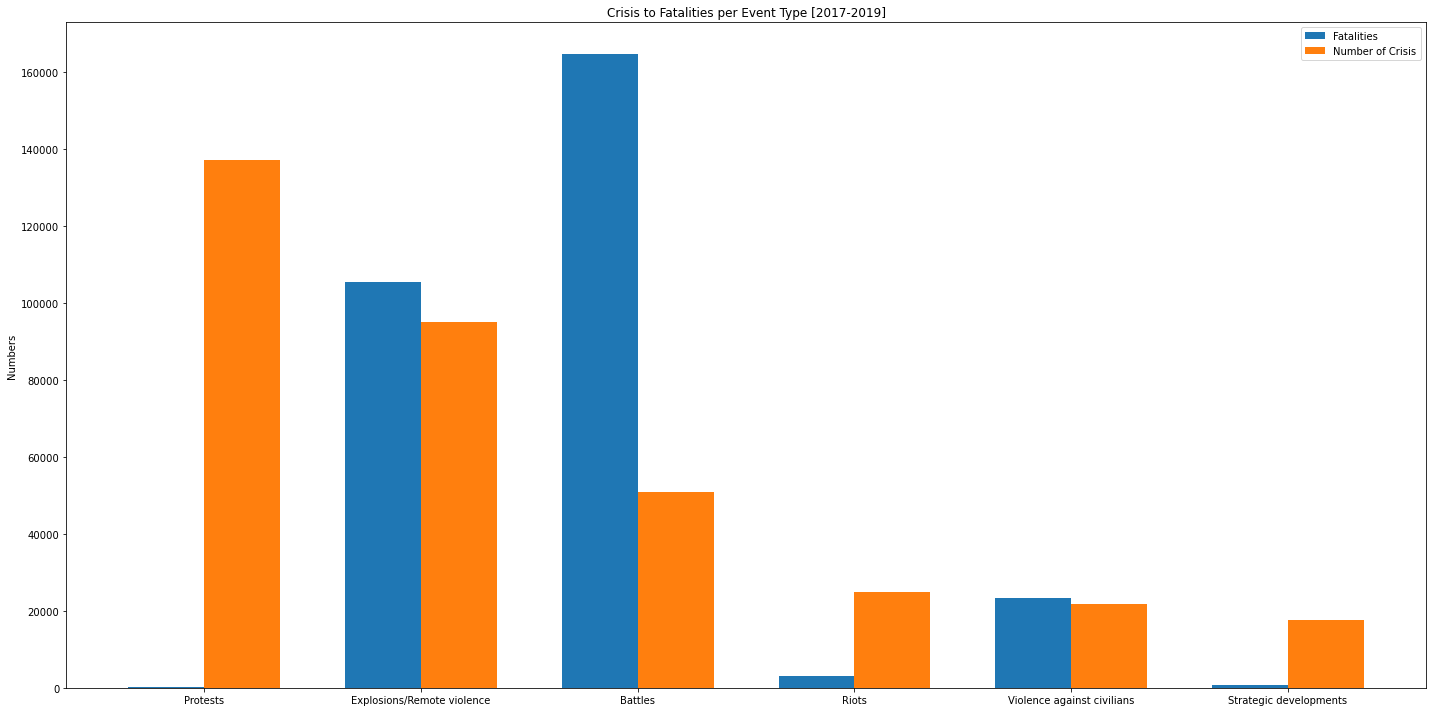

In [18]:
#Crisis to Fatalities per Event Type caused by All Actors[1997-2019]

data.crisis_to_fatalities_graph(asia_df, type='event_paired')

In [ ]:
#data.crisis_to_fatalities_graph(asia_df, type='crisis map') # name 'geopandas' is not defined

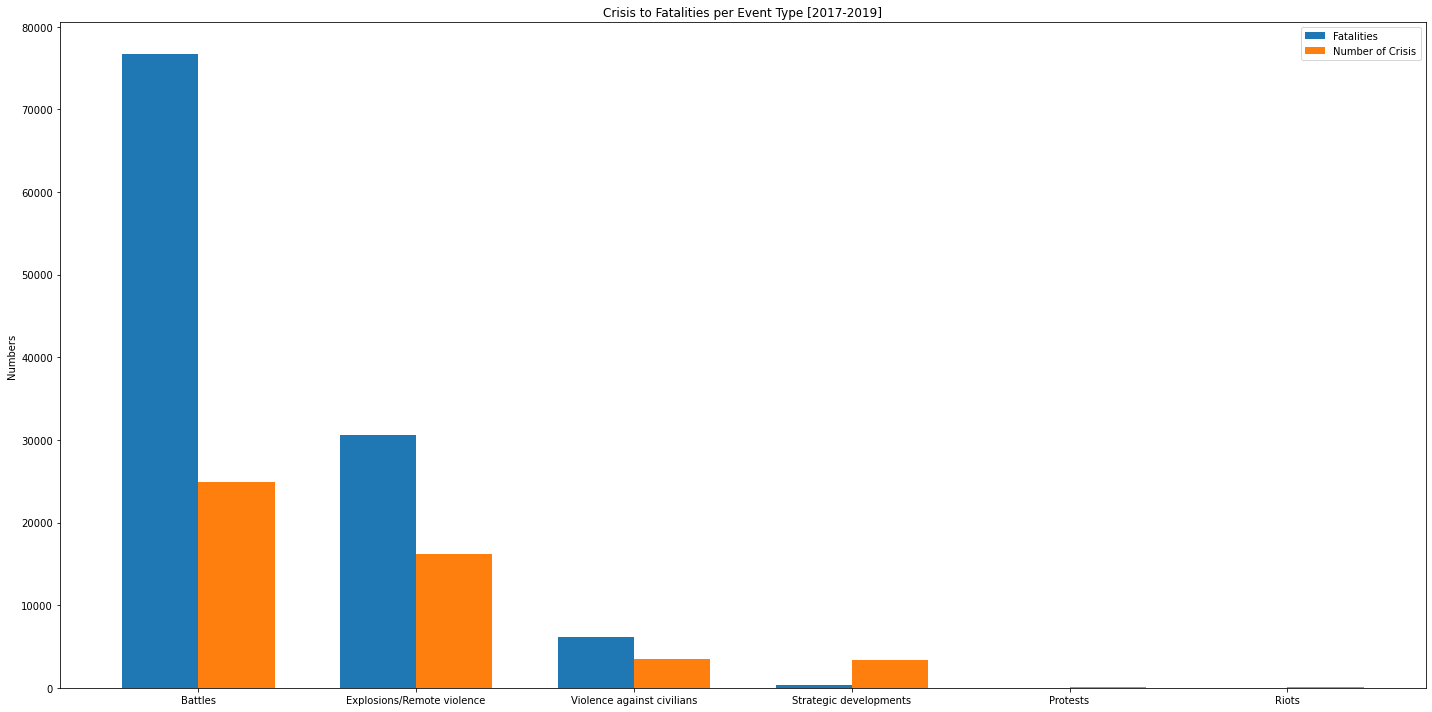

In [19]:
#Crisis to Fatalities per Country caused by Rebel Groups[1997-2019]

data.crisis_to_fatalities_graph(asia_rebel_groups_df, type='event_paired')

In [ ]:
#data.crisis_to_fatalities_graph(asia_rebel_groups_df, type='crisis map') # name 'geopandas' is not defined

Number of Crisis caused by Rebel Groups per Country[1997-March 2021]

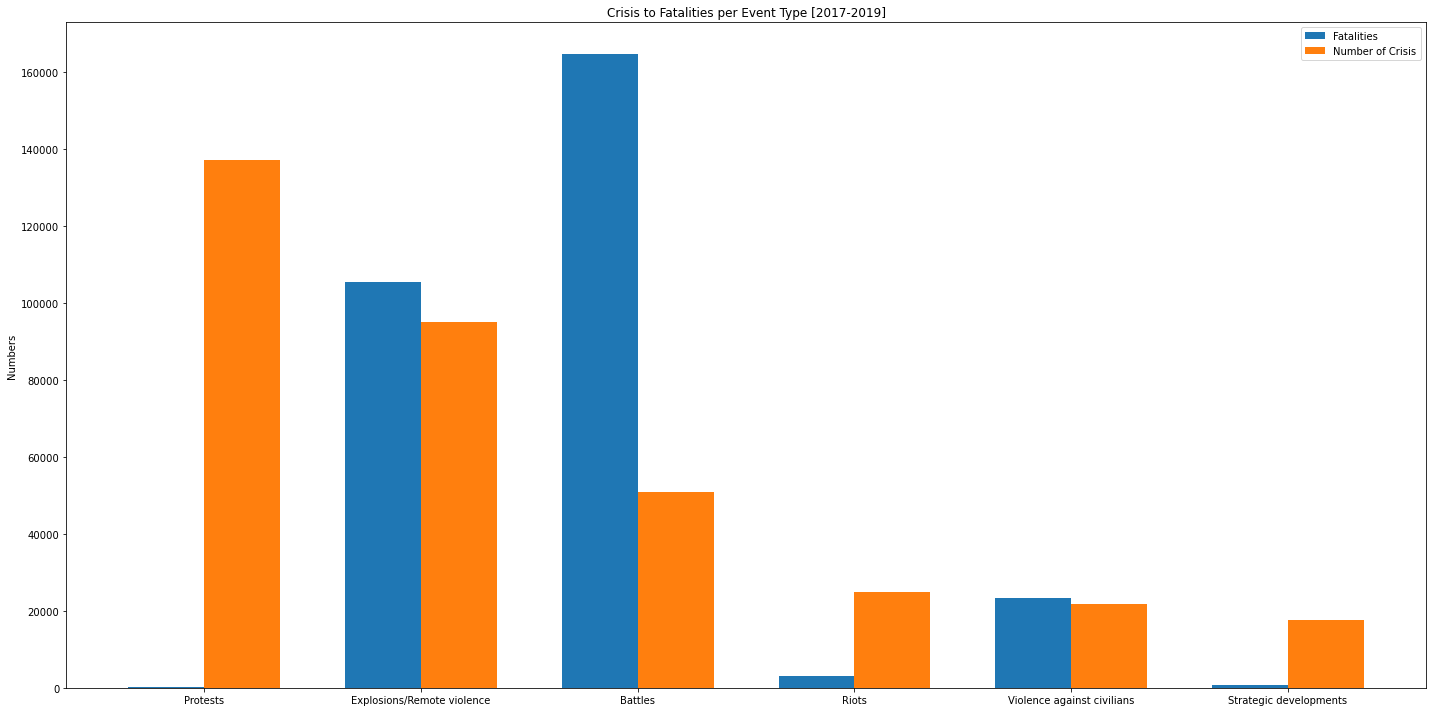

In [20]:
data.crisis_to_fatalities_graph(asia_df, type='event_paired')

Crisis to Fatalities per Country caused by Rebel Groups[2017-2019]

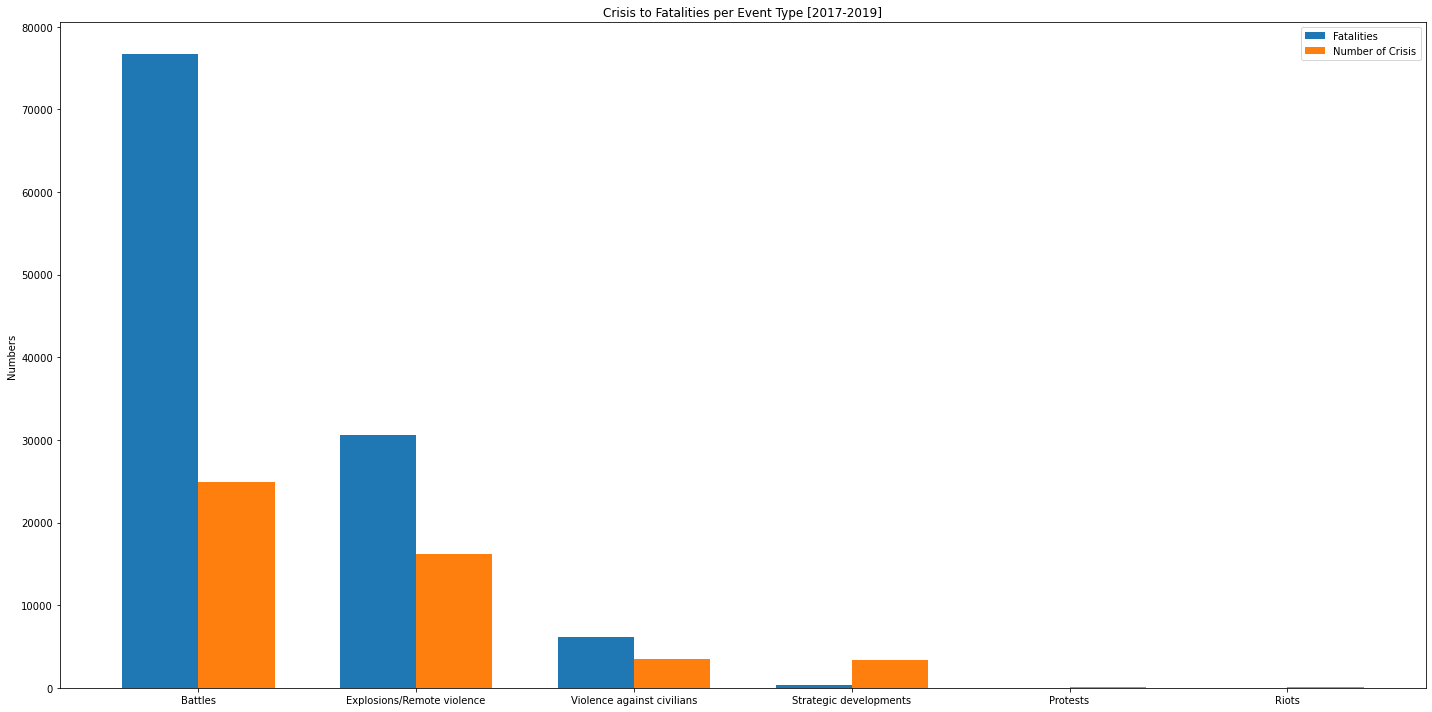

In [21]:
data.crisis_to_fatalities_graph(asia_rebel_groups_df, type='event_paired')